Project: Phishing Prevention for Twitter: Machine Learning Approach
Group 6:Daohui, Anish, Tejas and Ajinkya

In [1]:
import os                     # OS system library
from os.path import splitext  # OS library package to split URL into parts
import numpy as np            # numpy library for storing multi dimensional arrays
import matplotlib             # libary to plot graphs and visualize
import pandas as pd           # data set manipulation library
import ipaddress as ip        # library to detect IP address in URL
import tldextract             # library to separate TLD from domains in URL
try:                          # URL library to parse into string
    from urllib.parse import urlparse
except ImportError:
     from urlparse import urlparse

In [2]:
dataset = pd.read_csv("dataset.csv")   # read the dataset file
dataset = dataset.sample(frac=1).reset_index(drop=True) # 10 percent random sampling from dataset, with no index in columns
# dataset.head(n=10) # display first N rows

In [3]:
# List of suspicious TLDS 2017 :
SuspiciousTLDs = ['.ga','.gq','.ml','.cf','.tk','.xyz','.pw','.cc','.club','.work','.top',
                '.support','.bank','.info','.study','.party','.click','.country','.stream',
                '.mom','.xin','.kim','.men','.loan','.download','.racing','.online','.center',
                '.ren','.gb','.win','.review','.vip','.party','.tech','.science','.business']

SuspiciousDomains = ['spotmarka.ap0x.com','bin1.kns1.al','maminoleinc.tk','4w5wihkwyhsav2ha.dreamtest.at','ojmekzw4mujvqeju.dreamtest.at',
                   'jutrack.dp.ua','i01001.dgn.vn','x5sbb5gesp6kzwsh.homewind.pl','honourableud.top','aa12111.top','istyle.ge','dzitech.net',
                   'l3d.pp.ru','gyalkingerz.com']

Based on Lexical features, there are different parameters to decide whether the URL is safe or not. 

In [4]:
# Function to check if IP address used as aternate text in URL
def ipPresent(url):
    try:
        if ip.ip_address(url):
            return 1
    except:
        return 0
    
# Function to detect hyphens in the URL
def hyphenPresent(url):
    return url.count('-')
        
# Function to check if @ symbol is present in URL
def atPresent(url):
    return url.count('@')

# Function to check if there is redirection from the URL
def doubleslashPresent(url):
    return url.count('//')

# ------------------------------------------------------------------------------

# Function to count number of dots in the URL
def dotsCount(url):  
    return url.count('.')

# Function to count number of subdirectories
def subdirCount(url):
    return url.count('/')

# Function to count number of delimeters in the URL
# def delimeterCount(url):
#     delimeterList = [';','&','?','_','=']
#     count = 0
#     for char in url:
#         if char in delim:
#             count = count + 1
#     return count

# Function to count the number of sub-domains for the URL
def subDomainCount(url):
    if not url:
        return 0
    else:
        return len(url.split('.'))

# Function to count the queries in the URL
# def queryCount(url):
#     if not url:
#         return 0
#     else:
#         return len(url.split('&'))
    
# Function to get the URL extension
def getExtension(url):
    base, extension = splitext(url)
    return extension

In [5]:
featureList = pd.DataFrame(columns=('url','dotsCount','hyphenPresent','urlLength','atPresent',\
'doubleslashPresent','subdirCount','subdomainCount','domainLength','queryCount','ipPresent','suspicousTLDPresent',\
'suspiciousDomainPresent','label'))

In [6]:
def extractFeatures(url, label): 
    
    url = str(url) # convert to string first
    
    final = []     # results obtained after feature extraction 
    
    #  first add the url to featureList
    final.append(url)
    
    # URL is parsed and TLD is extracted
    path = urlparse(url)
    extension = tldextract.extract(url)
    
    # Add the Label value
    final.append(str(label))
    
    # URL size    
    final.append(len(url))
    
    # ------------------------------------------------------------------------------
    
    # check if IP address embedded in the URL    
    final.append(ipPresent(extension.domain))
        
    # check if hyphen is present   
    final.append(hyphenPresent(path.netloc))
    
    # check if @ symbol present   
    final.append(atPresent(path.netloc))
    
    # check if double slash present   
    final.append(doubleslashPresent(path.path))
    
    # check if it is suspicious TLD
    final.append(1 if extension.suffix in SuspiciousTLDs else 0)
    
    # check if it is suspicious domain
    final.append(1 if '.'.join(extension[1:]) in SuspiciousDomains else 0 )
    
    # -------------------------------------------------------------------------------
    
    # count number of dots   
    final.append(dotsCount(extension.subdomain))
    
    # count number of subdirectories
    final.append(subdirCount(path.path))
    
    # count number of subdomains
    final.append(subDomainCount(extension.subdomain))
    
    # check size of domain    
    final.append(len(path.netloc))
    
    # count the number of queries    
    final.append(len(path.query))

    return final

In [7]:
for i in range(len(dataset)):
    features = extractFeatures(dataset["URL"].loc[i], dataset["Label"].loc[i])    
    featureList.loc[i] = features      

In [8]:
# featureList.head(n=10)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
from __future__ import division

ImportError: DLL load failed: The specified module could not be found.

Lets visualize the data

 URL length Distributions of both Malicious as well as Benign URLs. 

In [60]:
# sns.set(style="darkgrid")
# sns.distplot(featureSet[featureSet['label']=='0'],color='g', label='Benign URLs')
# sns.distplot(featureSet[featureSet['label']=='1'],color='r', label='Phishing URLs')
# sns.plt.title('Url Length Distribution')

# plt.legend(loc='upper right')
# plt.xlabel('Length of URL')

# sns.plt.show()

#------------------------------------------------------------------------------------------------

# from sklearn.ensemble import GradientBoostingClassifier
# import matplotlib.pyplot as plt
# #GradientBoostingClassifier
# model = GradientBoostingClassifier(random_state=0,n_estimators=500).fit(X_train, y_train)

# # TODO: Extract the feature importances
# importances = model.feature_importances_

# # Plot
# vs.feature_plot(importances, X_train, y_train)




NameError: name 'X_train' is not defined

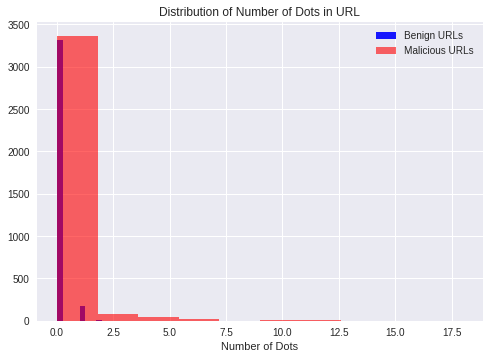

In [30]:
x=featureSet[featureSet['label']=='0']['no of dots']
y=featureSet[featureSet['label']=='1']['no of dots']
plt.hist(x,bins=8, alpha=0.9, label='Benign URLs',color='blue')
#sns.distplot(x,bins=8,color='blue',label='Benign URLs')
plt.hist(y,bins=10, alpha=0.6, label='Malicious URLs',color='red')
#sns.distplot(y,bins=8,color='red',label='Malicious URLs')
plt.legend(loc='upper right')
plt.xlabel('Number of Dots')
plt.title('Distribution of Number of Dots in URL')
plt.show()

Domain length Distributions of both Malicious as well as Benign URLs.

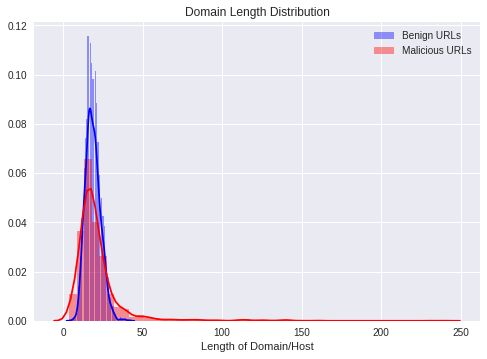

In [31]:
sns.set(style="darkgrid")
sns.distplot(featureSet[featureSet['label']=='0']['len of domain'],color='blue',label='Benign URLs')
sns.distplot(featureSet[featureSet['label']=='1']['len of domain'],color='red',label='Malicious URLs')
sns.plt.title('Domain Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Length of Domain/Host')
sns.plt.show()

In [36]:
'''
sns.set(style="whitegrid")
sns.distplot(featureSet[featureSet['label']==0]['create_age(months)'],color='green',label='Benign URLs')
sns.distplot(featureSet[featureSet['label']==1]['create_age(months)'],color='red',label='Malicious URLs')
sns.plt.title('Creation Age Distribution')
plt.legend(loc='upper right')
plt.xlabel('Age of Domain (Months)')
sns.plt.show()
'''

'\nsns.set(style="whitegrid")\nsns.distplot(featureSet[featureSet[\'label\']==0][\'create_age(months)\'],color=\'green\',label=\'Benign URLs\')\nsns.distplot(featureSet[featureSet[\'label\']==1][\'create_age(months)\'],color=\'red\',label=\'Malicious URLs\')\nsns.plt.title(\'Creation Age Distribution\')\nplt.legend(loc=\'upper right\')\nplt.xlabel(\'Age of Domain (Months)\')\nsns.plt.show()\n'

I can query minimal URL's per day using whois to get domain information. Waiting to get complete feature set, hence commented out

In [39]:
import sklearn.ensemble as ek
from sklearn import cross_validation, tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's just see the number of Benign and Phishin/Malicious emails

In [40]:
featureSet.groupby(featureSet['label']).size()

label
0    3494
1    3536
dtype: int64

Separate label and feature set. It would have been nice if I had domain features too. 

In [49]:
X = featureSet.drop(['url','label'],axis=1).values
y = featureSet['label'].values

### Time for Machine Learning

In [50]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":LogisticRegression()   
}

##### cross validation

In [51]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [53]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.896159317212 
RandomForest : 0.899715504979 
LogisticRegression : 0.842816500711 
GradientBoosting : 0.875533428165 
Adaboost : 0.871977240398 
GNB : 0.658605974395 


In [54]:
winner = max(results, key=results.get)
print(winner)

RandomForest


In [55]:
clf = model[winner]
res = clf.predict(X)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 3.634803 %
False negative rate : 4.779412 %


### Testing

Let's test' some of the malicious URL's listed in Trend Micro's website. http://apac.trendmicro.com/apac/security-intelligence/current-threat-activity/malicious-top-ten/

In [52]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))

results = getFeatures('trafficconverter.biz:80/4vir/antispyware/loadadv.exe', '1')
result.loc[0] = results
result = result.drop(['url','label'],axis=1).values
print(clf.predict(result))

['1']


Success! One more time :) 

In [56]:
result = pd.DataFrame(columns=('url','no of dots','presence of hyphen','len of url','presence of at',\
'presence of double slash','no of subdir','no of subdomain','len of domain','no of queries','is IP','presence of Suspicious_TLD',\
'presence of suspicious domain','label'))

results = getFeatures('am10.ru:80/code.php', '1')
result.loc[0] = results
result = result.drop(['url','label'],axis=1).values
print(clf.predict(result))

['1']
